## Feature Importance and Model's Accuracy Visualization

This script contain the feature importance analysis and model accuracy visualization from the classification of detailed LULC Mapping. T
<br>
This script is organized as follows:
1. Accuracy Visualization
2. Feature Importance Analysis

**1.1 Accuracy Visualization**

The data is in the form of list as the result of Model Accuracy analysis from the previous script

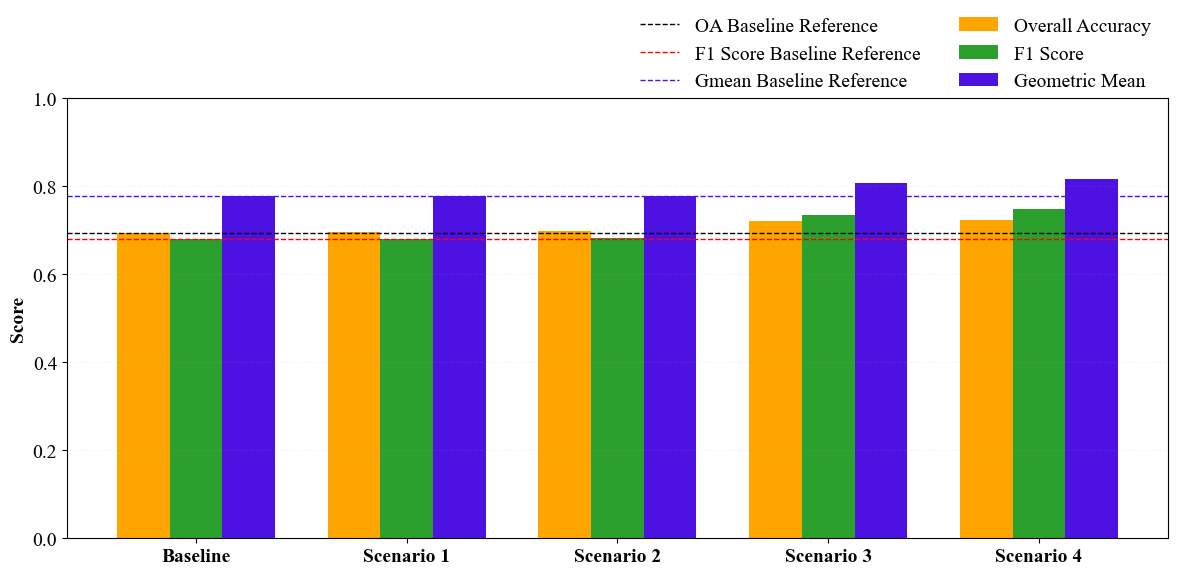

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Data
classifiers = ['Baseline', 'Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenario 4']
land_oa = [0.693077, 0.696000, 0.696308, 0.720154, 0.722923]  # Overall Accuracy
land_f1 = [0.678931, 0.678330, 0.681753, 0.732697, 0.747771]  # F1 Score
land_gm = [0.776556, 0.776046, 0.778017, 0.807265, 0.815318]  # Geometric Mean
land_ce = [1.411279, 1.441576, 1.359539, 1.218592, 1.200478]  # Cross Entropy Loss

x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars with distinct colors for each metric
oa_bars = ax.bar(x - width, land_oa, width, label='Overall Accuracy', color='orange')
f1_bars = ax.bar(x, land_f1, width, label='F1 Score', color='#2ca02c')
gm_bars = ax.bar(x + width, land_gm, width, label='Geometric Mean', color='#4D12E2')

# Baseline reference line
ax.axhline(y=land_oa[0], color='black', linestyle='--', linewidth=1, label='OA Baseline Reference')
ax.axhline(y=land_f1[0], color='red', linestyle='--', linewidth=1, label='F1 Score Baseline Reference')
ax.axhline(y=land_gm[0], color='#4D12E2', linestyle='--', linewidth=1, label='Gmean Baseline Reference')


# Axis and label formatting
ax.set_ylabel('Score', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classifiers, fontweight='bold', fontsize= 14)
ax.set_ylim(0, 1)

# Improved legend
legend = ax.legend(loc='right', bbox_to_anchor=(1, 1.1), ncol=2, frameon=False)
for text in legend.get_texts():
    text.set_fontsize(14)
    text.set_color('black')  # or custom color

plt.grid(axis='y', linestyle='--', alpha=0.1)
plt.tight_layout()
plt.rcParams.update({
    'font.family': 'Times New Roman',     # Change to any installed font (e.g., 'Times New Roman')
    'font.size': 14,            # Base font size (adjust to your preference)
    'axes.labelsize': 12,       # Axis label font size
    'xtick.labelsize': 14,      # X-axis tick font size
    'ytick.labelsize': 14,      # Y-axis tick font size
    'legend.fontsize': 14,      # Legend font size
})
plt.show()


**2.1 Feature Importance Analysis**
<br>
Since XGBoost is used in the classification, feature importance analysis will be conducted using two main metrics:
1. Weight Importance (frequency)
This metric quantifies the frequency in which a feature is used to split data across boosted trees. Features utilized more frequently is considered important to the model’s decision-making process, while the rest is used to improve residuals (Shi et al., 2019).  Weight importance determines whether TCT axes are actively utilized in the model's architecture.
<br>
2. Gain Importance (predictive power)
This metric measures the actual decrease in node impurity, which is the average gain across all splits which the feature are used (Shi et al., 2019; S. Zheng et al., 2017). This metric directly reflects a feature’s predictive power, with higher values indicating greater contribution to classification performance. Gain importance evaluates whether these axes meaningfully improve classification accuracy.


**2.1 Load the previous training data and best estimator**


In [7]:
import joblib
#Load the previous training data
x_train_l9 = np.load('C:/Master of Remote Sensing/Python Code/Tascap_Project/Region of Interest/Numpy TD/x_train_L9.npy')
x_test_l9 = np.load('C:/Master of Remote Sensing/Python Code/Tascap_Project/Region of Interest/Numpy TD/x_test_L9.npy')
y_train_l9 = np.load('C:/Master of Remote Sensing/Python Code/Tascap_Project/Region of Interest/Numpy TD/y_train_L9.npy')
y_test_l9 = np.load('C:/Master of Remote Sensing/Python Code/Tascap_Project/Region of Interest/Numpy TD/x_train_L9.npy')

band_name = [
    'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10','elevation', 'slope','TPILF','aspect', 'FlowA', 'TWI', 'brightness', 'greenness', 'wetness',
    'TCA', 'NDVI','BUI', 'MNDWI', 'EVI', 'AWEI']
# Define feature groups by name
groups = {
    "Multispectral_only": ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10'],
    "Multispectral_TC": ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', 'brightness', 'greenness', 'wetness', 'TCA'],
    "Multispectral_Topo_TC": ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', 'brightness', 'greenness', 'wetness', 'TCA',
                           'elevation', 'slope','TPILF','aspect', 'FlowA', 'TWI'],
    "Multispectral_TC_Spec": ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', 'brightness', 'greenness', 'wetness', 'TCA', 'NDVI','BUI', 'MNDWI', 'EVI', 'AWEI'],                      
    "All_Features": band_name  # Everything
}
# Get indices for each group
group_indices = {}
for group_name, features in groups.items():
    indices = [band_name.index(band) for band in features]
    group_indices[group_name] = indices
# Example: Subset for "Multispectral_only"
group = "Multispectral_only"
x_train_ms = x_train_l9[:, group_indices[group]]
x_test_ms = x_test_l9[:, group_indices[group]]

print(f"Shape of {group} features - Train: {x_train_ms.shape}, Test: {x_test_ms.shape}")
# Example: Subset for "Multispectral_TC"
group = "Multispectral_Topo_TC"
x_train_topo = x_train_l9[:, group_indices[group]]
x_test_topo = x_test_l9[:, group_indices[group]]

print(f"Shape of {group} features - Train: {x_train_topo.shape}, Test: {x_test_topo.shape}")
# Example: Subset for "Multispectral_TC_Topo"
group = "Multispectral_TC"
x_train_tc = x_train_l9[:, group_indices[group]]
x_test_tc = x_test_l9[:, group_indices[group]]

print(f"Shape of {group} features - Train: {x_train_tc.shape}, Test: {x_test_tc.shape}")
# Example: Subset for "Multispectral_TC_Topo"
group = "Multispectral_TC_Spec"
x_train_spec = x_train_l9[:, group_indices[group]]
x_test_spec = x_test_l9[:, group_indices[group]]

print(f"Shape of {group} features - Train: {x_train_spec.shape}, Test: {x_test_spec.shape}")
best_ms = joblib.load('C:\Master of Remote Sensing\Python Code\Tascap_Project\Trained Model\Best_ms_old.pkl')
best_tc = joblib.load('C:\Master of Remote Sensing\Python Code\Tascap_Project\Trained Model\Best_tc_old.pkl')
best_topo = joblib.load('C:\Master of Remote Sensing\Python Code\Tascap_Project\Trained Model\Best_topo_old.pkl')
best_spec = joblib.load('C:\Master of Remote Sensing\Python Code\Tascap_Project\Trained Model\Best_spec_old.pkl')
best_all = joblib.load('C:\Master of Remote Sensing\Python Code\Tascap_Project\Trained Model\Best_all_old.pkl')


Shape of Multispectral_only features - Train: (15165, 8), Test: (6500, 8)
Shape of Multispectral_Topo_TC features - Train: (15165, 18), Test: (6500, 18)
Shape of Multispectral_TC features - Train: (15165, 12), Test: (6500, 12)
Shape of Multispectral_TC_Spec features - Train: (15165, 17), Test: (6500, 17)


**2.2 Weight Based Importance**

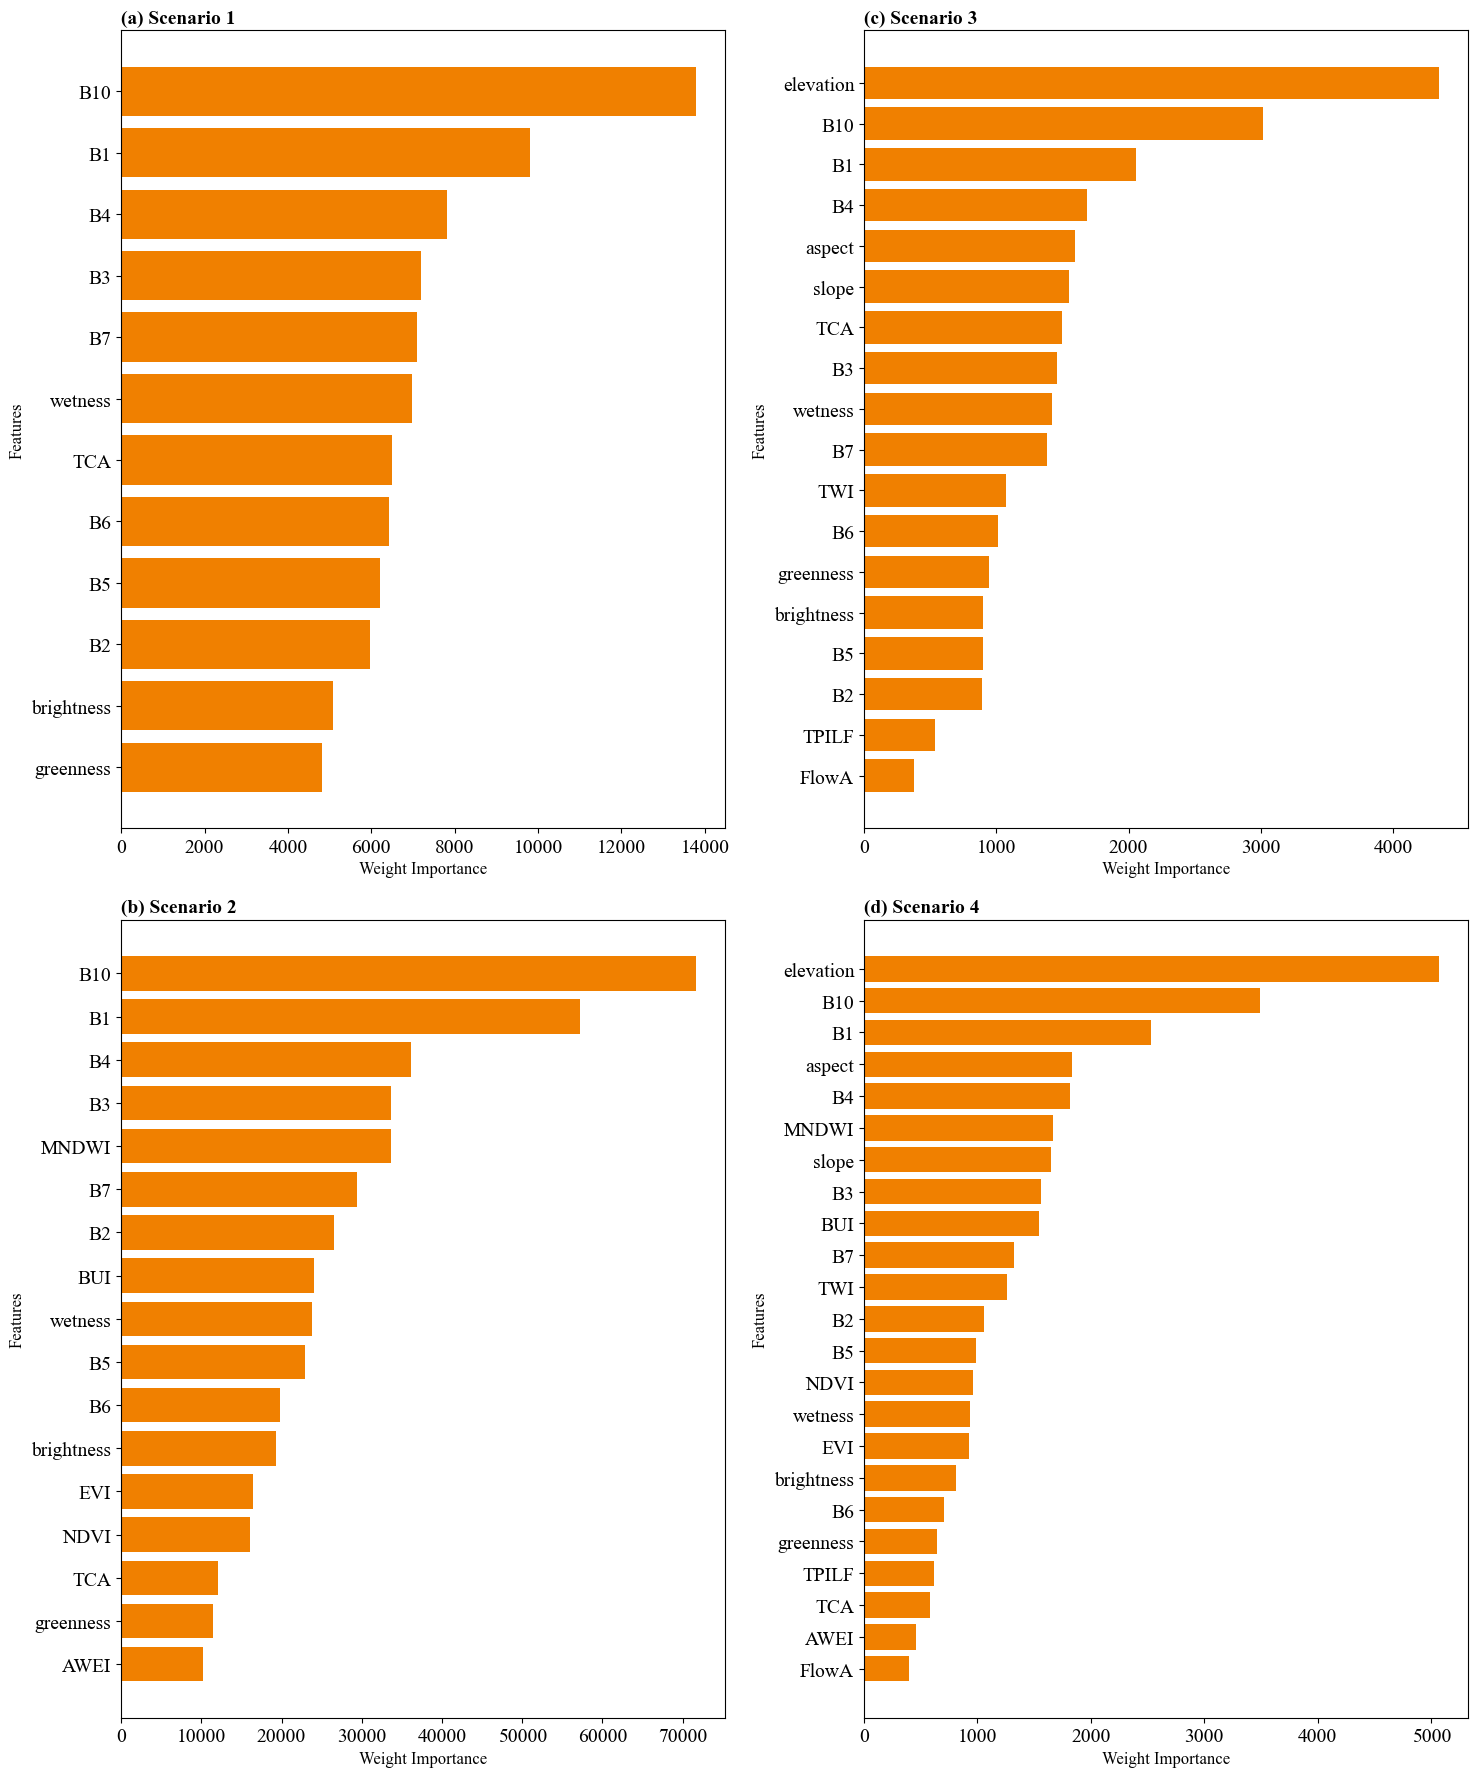

In [8]:
# Define custom titles and subplot labels
custom_titles = {
    #"Multispectral_only": "Baseline Scenario",
    "Multispectral_TC": "Scenario 1",
    "Multispectral_Topo_TC": "Scenario 3",
    "Multispectral_TC_Spec": "Scenario 2",
    "All_Features": "Scenario 4",
}

subplot_labels = ['(a)', '(c)', '(b)', '(d)']

# Dictionary of models and corresponding training data
models = {
    #"Multispectral_only": (best_ms, x_train_l9[:, group_indices["Multispectral_only"]], groups["Multispectral_only"]),
    "Multispectral_TC": (best_tc, x_train_l9[:, group_indices["Multispectral_TC"]], groups["Multispectral_TC"]),
    "Multispectral_Topo_TC": (best_topo, x_train_l9[:, group_indices["Multispectral_Topo_TC"]], groups["Multispectral_Topo_TC"]),
    "Multispectral_TC_Spec": (best_spec, x_train_l9[:, group_indices["Multispectral_TC_Spec"]], groups["Multispectral_TC_Spec"]),
    "All_Features": (best_all, x_train_l9[:, group_indices["All_Features"]], groups["All_Features"]),
}

# Plot configuration
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 18))
axes = axes.flatten()
importance_type = 'weight'
# Global font settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
for i, (scenario, (model, X_data, feature_names)) in enumerate(models.items()):
    booster = model.get_booster()
    score_dict = booster.get_score(importance_type=importance_type)

    # Map 'f0', 'f1', etc. to actual feature names
    mapped_scores = {feature_names[int(k[1:])]: v for k, v in score_dict.items() if k[1:].isdigit() and int(k[1:]) < len(feature_names)}

    # Fill missing features with 0 if not used
    for fname in feature_names:
        mapped_scores.setdefault(fname, 0)

    # Sort by importance
    sorted_scores = dict(sorted(mapped_scores.items(), key=lambda item: item[1], reverse=True))

    ax = axes[i]
    ax.barh(list(sorted_scores.keys()), list(sorted_scores.values()), color='#F08000')
    ax.set_title(f"{subplot_labels[i]} {custom_titles[scenario]}", fontsize=14, fontweight= 'bold', loc='left')
    ax.set_xlabel(f'{importance_type.capitalize()} Importance')
    ax.set_ylabel('Features')
    ax.invert_yaxis()

# Hide any unused subplots (only 5 used here)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


**2.3 Gain Based Importance**

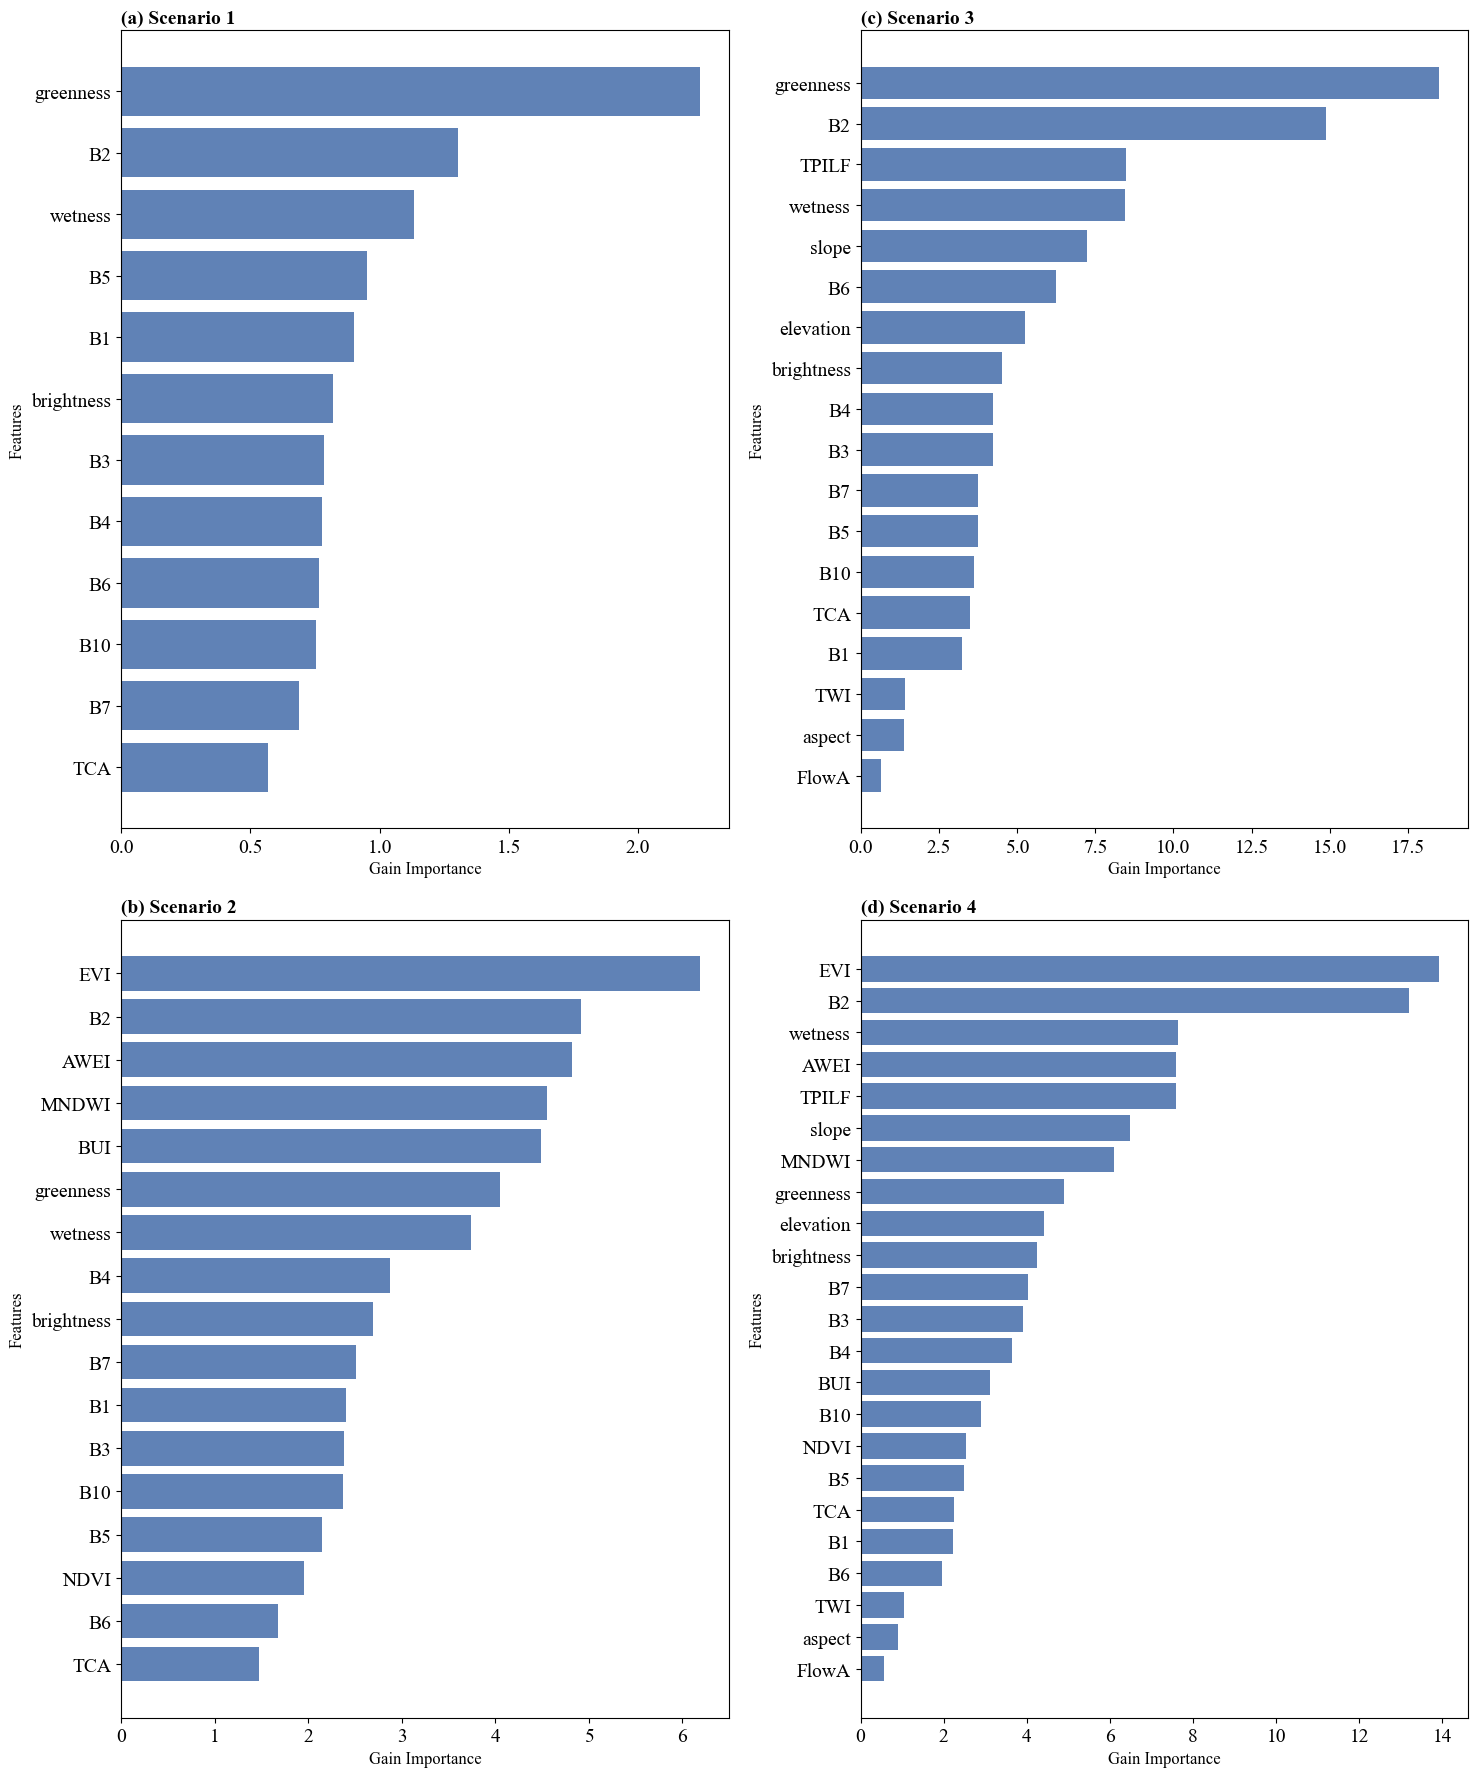

In [9]:
# Plot configuration
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 18))
axes = axes.flatten()
importance_type = 'gain'
# Global font settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
for i, (scenario, (model, X_data, feature_names)) in enumerate(models.items()):
    booster = model.get_booster()
    score_dict = booster.get_score(importance_type=importance_type)

    # Map 'f0', 'f1', etc. to actual feature names
    mapped_scores = {feature_names[int(k[1:])]: v for k, v in score_dict.items() if k[1:].isdigit() and int(k[1:]) < len(feature_names)}

    # Fill missing features with 0 if not used
    for fname in feature_names:
        mapped_scores.setdefault(fname, 0)

    # Sort by importance
    sorted_scores = dict(sorted(mapped_scores.items(), key=lambda item: item[1], reverse=True))

    ax = axes[i]
    ax.barh(list(sorted_scores.keys()), list(sorted_scores.values()), color='#6082B6')
    ax.set_title(f"{subplot_labels[i]} {custom_titles[scenario]}", fontsize=14, fontweight= 'bold', loc='left')
    ax.set_xlabel(f'{importance_type.capitalize()} Importance')
    ax.set_ylabel('Features')
    ax.invert_yaxis()

# Hide any unused subplots (only 5 used here)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()
